# 1. Analysis begin with the exploration of data.

The data has 23 columns and 16857 rows

In [34]:
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 import numpy as np
 from sklearn.preprocessing import MinMaxScaler

# data display
df = pd.read_csv('/content/data.csv', on_bad_lines='skip')
display(df.head())
print(df.shape)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


(16857, 29)


Here in we do a data overview, check for missing values, outlier detection and correlation analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

None

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


,count
timestamp,
2016-02-13 00:00:00,2
2016-02-05 09:50:00,2
2016-04-06 23:10:00,2
2016-05-02 13:20:00,2
2016-05-04 04:30:00,2
...,...
2016-02-19 15:40:00,1
2016-02-19 15:30:00,1
2016-02-19 15:20:00,1


,count
equipment_energy_consumption,
50.0,3400
60.0,2385
40.0,1762
70.0,1193
80.0,905
...,...
870.0,1
-160.0,1
840.0,1


,count
lighting_energy,
0.0,11687
10.0,1895
20.0,1339
30.0,480
-77.78778596503064,177
86.00296632575207,168
-0.0,116
40.0,71
-10.0,24


,count
zone1_temperature,
21.0,479
21.39,457
21.2,446
21.5,430
21.29,419
...,...
22.65,1
21.7675,1
23.03,1


,count
zone1_humidity,
3.348059697903068,164
76.29275599510133,156
37.2,129
39.09,126
36.9,121
...,...
36.8666666666667,1
36.2225,1
34.4475,1


,count
zone2_temperature,
19.6,303
19.2,303
19.5,302
19.7,296
19.29,276
...,...
16.865,1
17.815,1
18.1966666666667,1


Missing Values Percentage:
 timestamp                       0.000000
equipment_energy_consumption    5.006822
lighting_energy                 4.799193
zone1_temperature               5.143264
zone1_humidity                  4.751735
zone2_temperature               5.060212
zone2_humidity                  5.143264
zone3_temperature               4.757667
zone3_humidity                  5.208519
zone4_temperature               4.840719
zone4_humidity                  4.633090
zone5_temperature               4.971229
zone5_humidity                  4.751735
zone6_temperature               5.030551
zone6_humidity                  5.024619
zone7_temperature               4.710209
zone7_humidity                  4.775464
zone8_temperature               5.030551
zone8_humidity                  4.609361
zone9_temperature               4.585632
zone9_humidity                  5.267841
outdoor_temperature             4.781396
atmospheric_pressure            4.994958
outdoor_humidity             

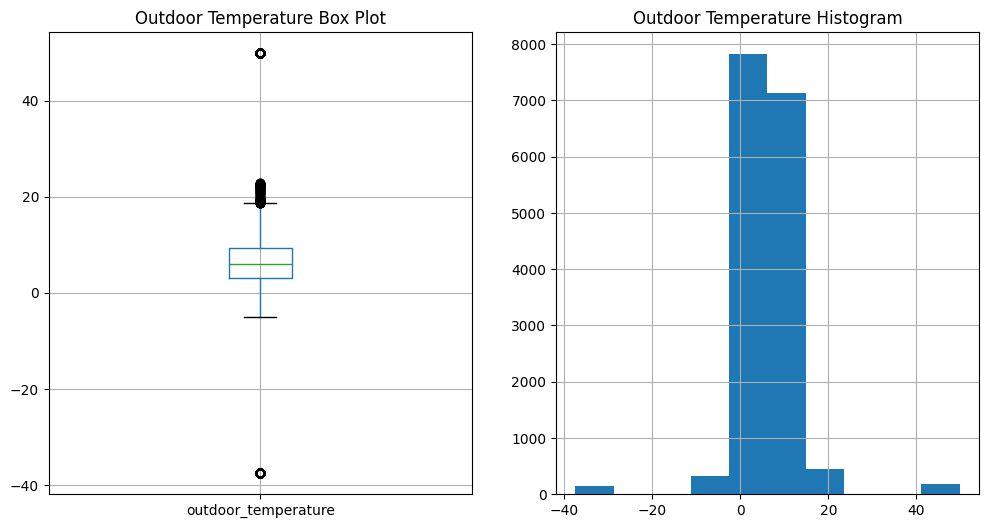

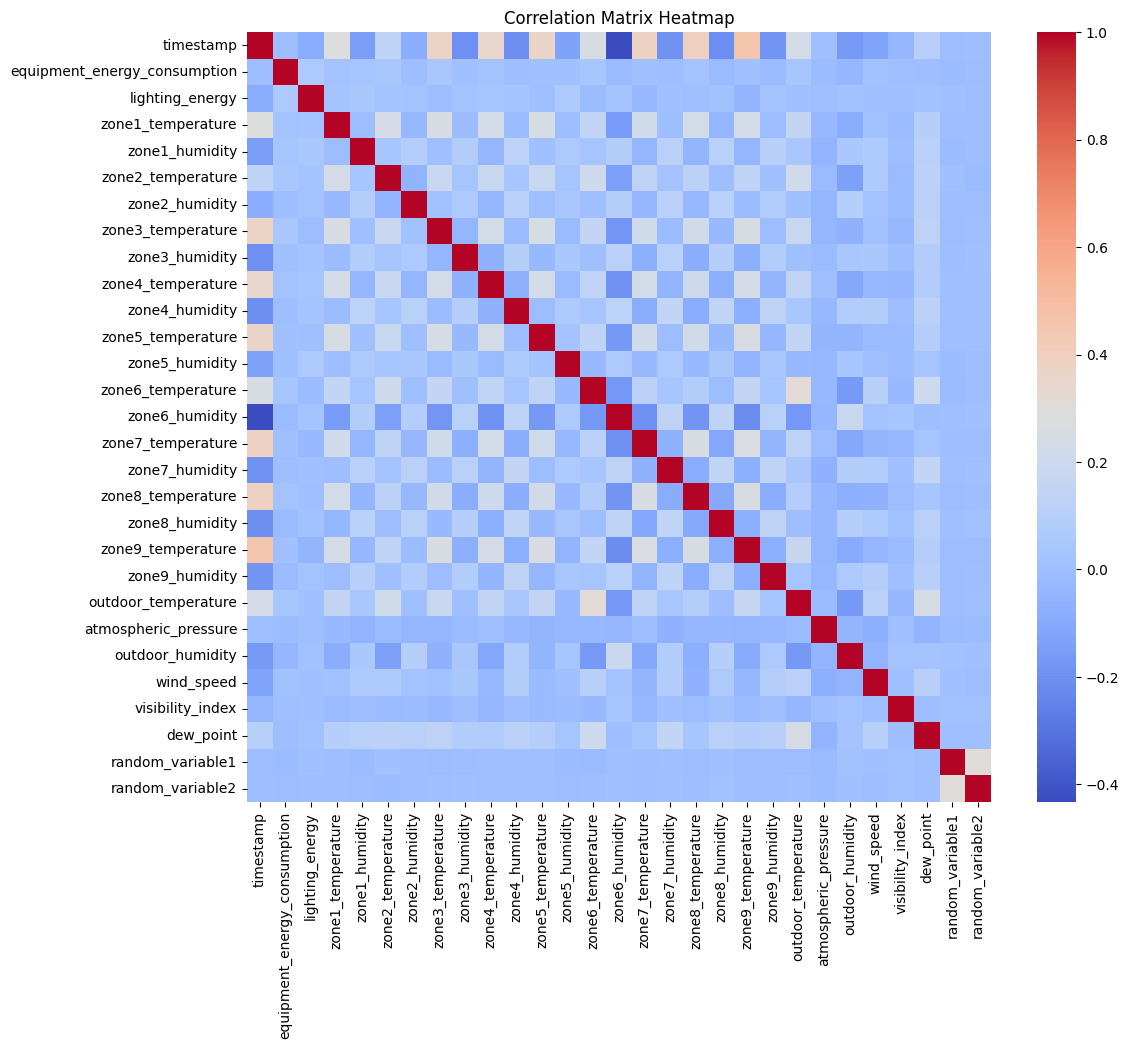

In [35]:
# Data Overview
display(df.info())
display(df.describe())
for col in df.select_dtypes(include=['object', 'category']):
    display(df[col].value_counts())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values Percentage:\n", missing_percentage)

# Outlier Detection
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='outdoor_temperature')
plt.title('Outdoor Temperature Box Plot')
plt.subplot(1, 2, 2)
df['outdoor_temperature'].hist()
plt.title('Outdoor Temperature Histogram')
plt.show()

# Correlation Analysis
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
correlation_matrix = df.corr(numeric_only=True)

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



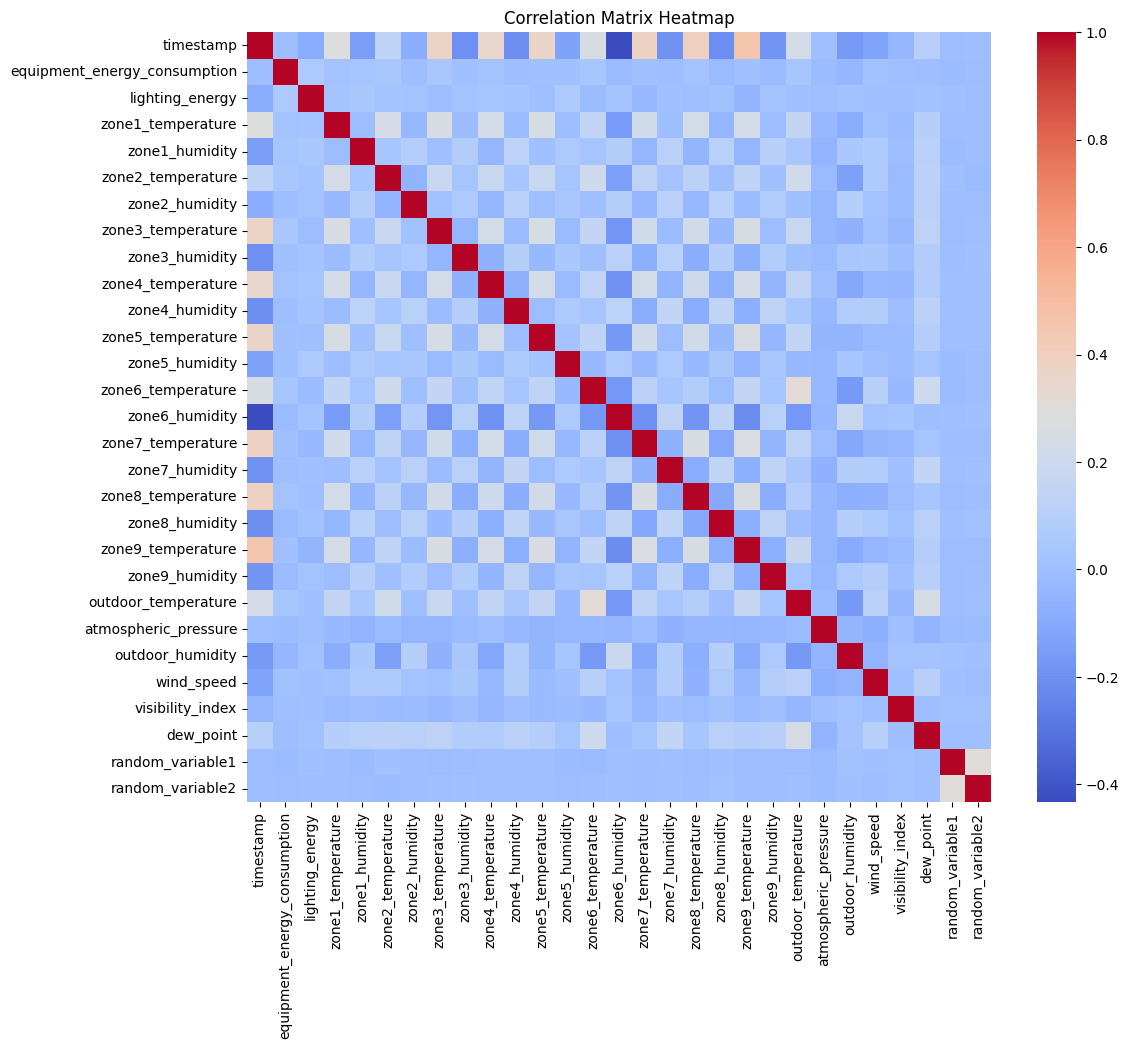

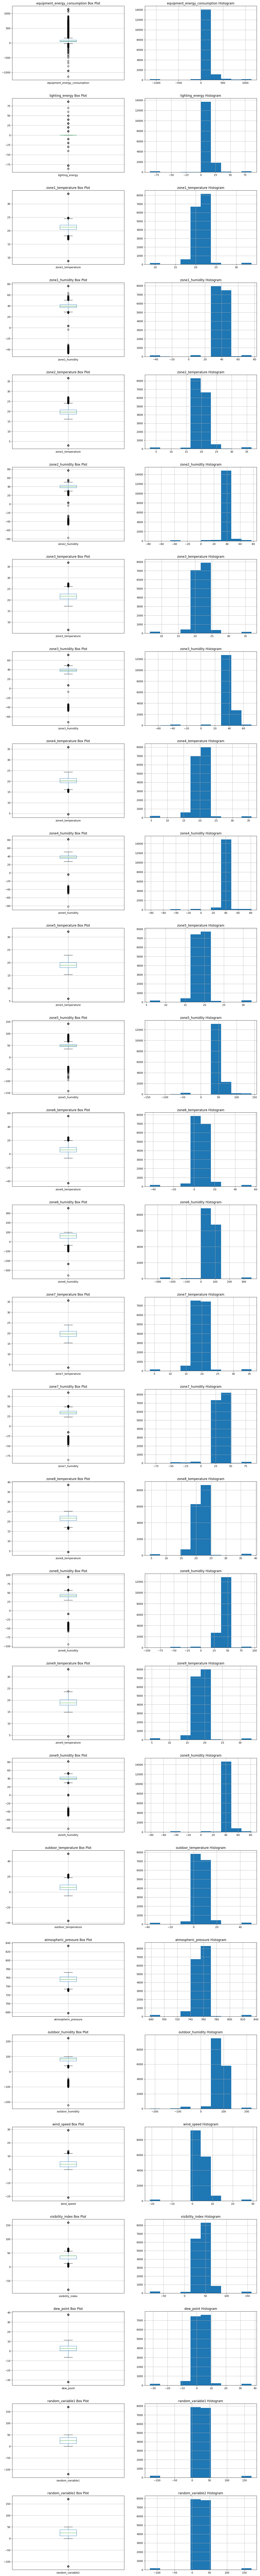

In [36]:

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Re-attempt numeric conversion for problematic columns
for col in ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature', 'zone2_humidity', 'zone6_humidity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection
numerical_features = df.select_dtypes(include=['float64', 'int64'])
num_plots = len(numerical_features.columns)
fig, axes = plt.subplots(num_plots, 2, figsize=(15, 5 * num_plots))
fig.tight_layout(pad=5.0)
for i, col in enumerate(numerical_features.columns):
    df.boxplot(column=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Box Plot')
    df[col].hist(ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Histogram')
plt.show()

The output shows the percentage of missing values for each column, for visualizing outlier detection we used a box plot. In correlation analysis: darker red represents positive correlation and darker blue represents negative correlation

# 2. Data cleaning-dealing with missing values and outliers.



 Impute missing values using median for numerical features and most frequent category for categorical features. Drop columns with more than 50% missing values. Handle outliers using IQR method and replace them with the 95th percentile.

In [37]:
# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Missing value imputation
for col in numerical_cols:
    if df[col].isnull().sum() / len(df) > 0.5:
        print(f"Dropping column '{col}' due to more than 50% missing values.")
        df.drop(col, axis=1, inplace=True)
        numerical_cols = numerical_cols.drop(col)
    else:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Imputed missing values in '{col}' with median.")

for col in categorical_cols:
    if df[col].isnull().sum() / len(df) > 0.5:
        print(f"Dropping column '{col}' due to more than 50% missing values.")
        df.drop(col, axis=1, inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Imputed missing values in '{col}' with the most frequent category.")

# Outlier handling
for col in numerical_cols:
    if col != 'timestamp':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = len(outliers)
        print(f"Number of outliers in '{col}': {num_outliers}")
        df[col] = np.clip(df[col], lower_bound, df[col].quantile(0.95))
        print(f"Outliers in '{col}' replaced with 95th percentile.")

# Verify no missing values
print(f"Number of missing values after imputation: {df.isnull().sum().sum()}")

# Verify no outliers
for col in numerical_cols:
    if col != 'timestamp':
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      num_outliers = len(outliers)
      print(f"Number of outliers remaining in '{col}': {num_outliers}")

<ipython-input-37-33c73d13c949>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Imputed missing values in 'equipment_energy_consumption' with median.
Imputed missing values in 'lighting_energy' with median.
Imputed missing values in 'zone1_temperature' with median.
Imputed missing values in 'zone1_humidity' with median.
Imputed missing values in 'zone2_temperature' with median.
Imputed missing values in 'zone2_humidity' with median.
Imputed missing values in 'zone3_temperature' with median.
Imputed missing values in 'zone3_humidity' with median.
Imputed missing values in 'zone4_temperature' with median.
Imputed missing values in 'zone4_humidity' with median.
Imputed missing values in 'zone5_temperature' with median.
Imputed missing values in 'zone5_humidity' with median.
Imputed missing values in 'zone6_temperature' with median.
Imputed missing values in 'zone6_humidity' with median.
Imputed missing values in 'zone7_temperature' with median.
Imputed missing values in 'zone7_humidity' with median.
Imputed missing values in 'zone8_temperature' with median.
Imputed m

# 3. Data transformation and feature engineering


 Here we perform data type conversion, feature engineering, outlier handling, and normalization/scaling.

In [38]:
# Data Type Conversion
df['timestamp'] = pd.to_datetime(df['timestamp'])

for col in ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature', 'zone2_humidity', 'zone3_temperature', 'zone3_humidity', 'zone4_temperature', 'zone4_humidity', 'zone5_temperature', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_temperature', 'zone7_humidity', 'zone8_temperature', 'zone8_humidity', 'zone9_temperature', 'zone9_humidity', 'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point', 'random_variable1', 'random_variable2']:
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')


# Feature Engineering
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Handling Remaining Outliers (using the same IQR method but with transformed data)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if col not in ['hour', 'dayofweek', 'month']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound.iloc[0] if isinstance(lower_bound, pd.Series) else lower_bound,
                           upper_bound.iloc[0] if isinstance(upper_bound, pd.Series) else upper_bound)


# Normalization/Scaling (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
  if col not in ['hour', 'dayofweek', 'month']:
    df[col] = scaler.fit_transform(df[[col]])

Prepared the data for analysis by ensuring the correct data types for the columns. Created new features from the timestamp. Handled outliers to remove their impact and sclaed numerical features to a common range

Handling Missing Data:

Numerical features with missing values were filled using the median, while categorical features were imputed with the most frequent category (mode). To prevent bias from excessive missing data, columns containing over 50% missing values were excluded from the analysis.

Addressing Outliers:

The initial approach to outlier handling involved identifying and adjusting values exceeding 1.5 times the interquartile range (IQR) beyond the first and third quartiles (Q1 and Q3). However, subsequent transformations revealed persistent outliers, which were addressed using a similar IQR-based method, although complete elimination was not achieved.

Visual Exploration:

Histograms and box plots were employed to visualize the distribution and central tendencies of the numerical features, providing insights into their characteristics. Additionally, correlation matrices were generated and presented as heatmaps to illustrate the relationships between variables.


# 4. Data Visualization

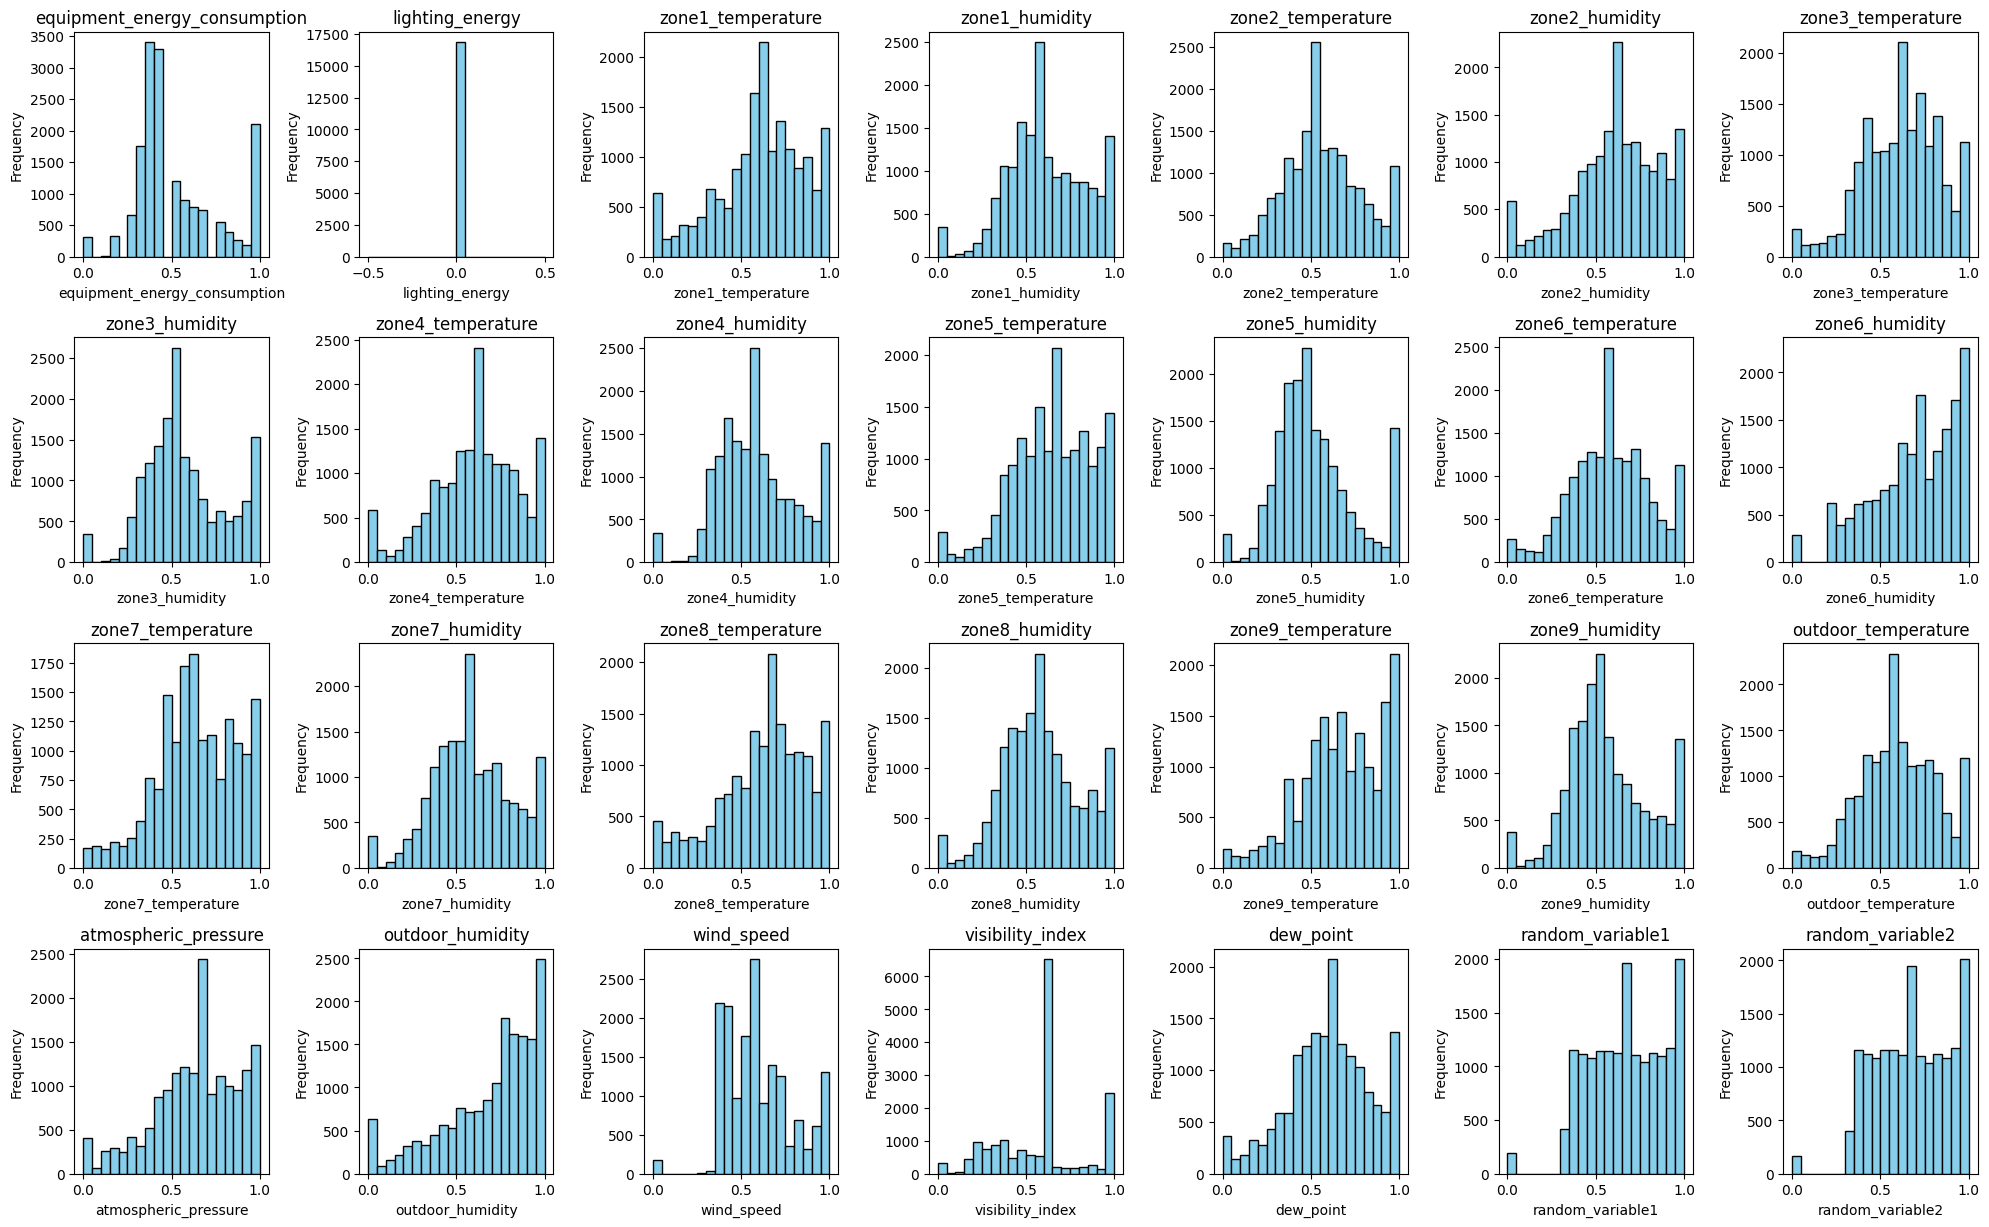

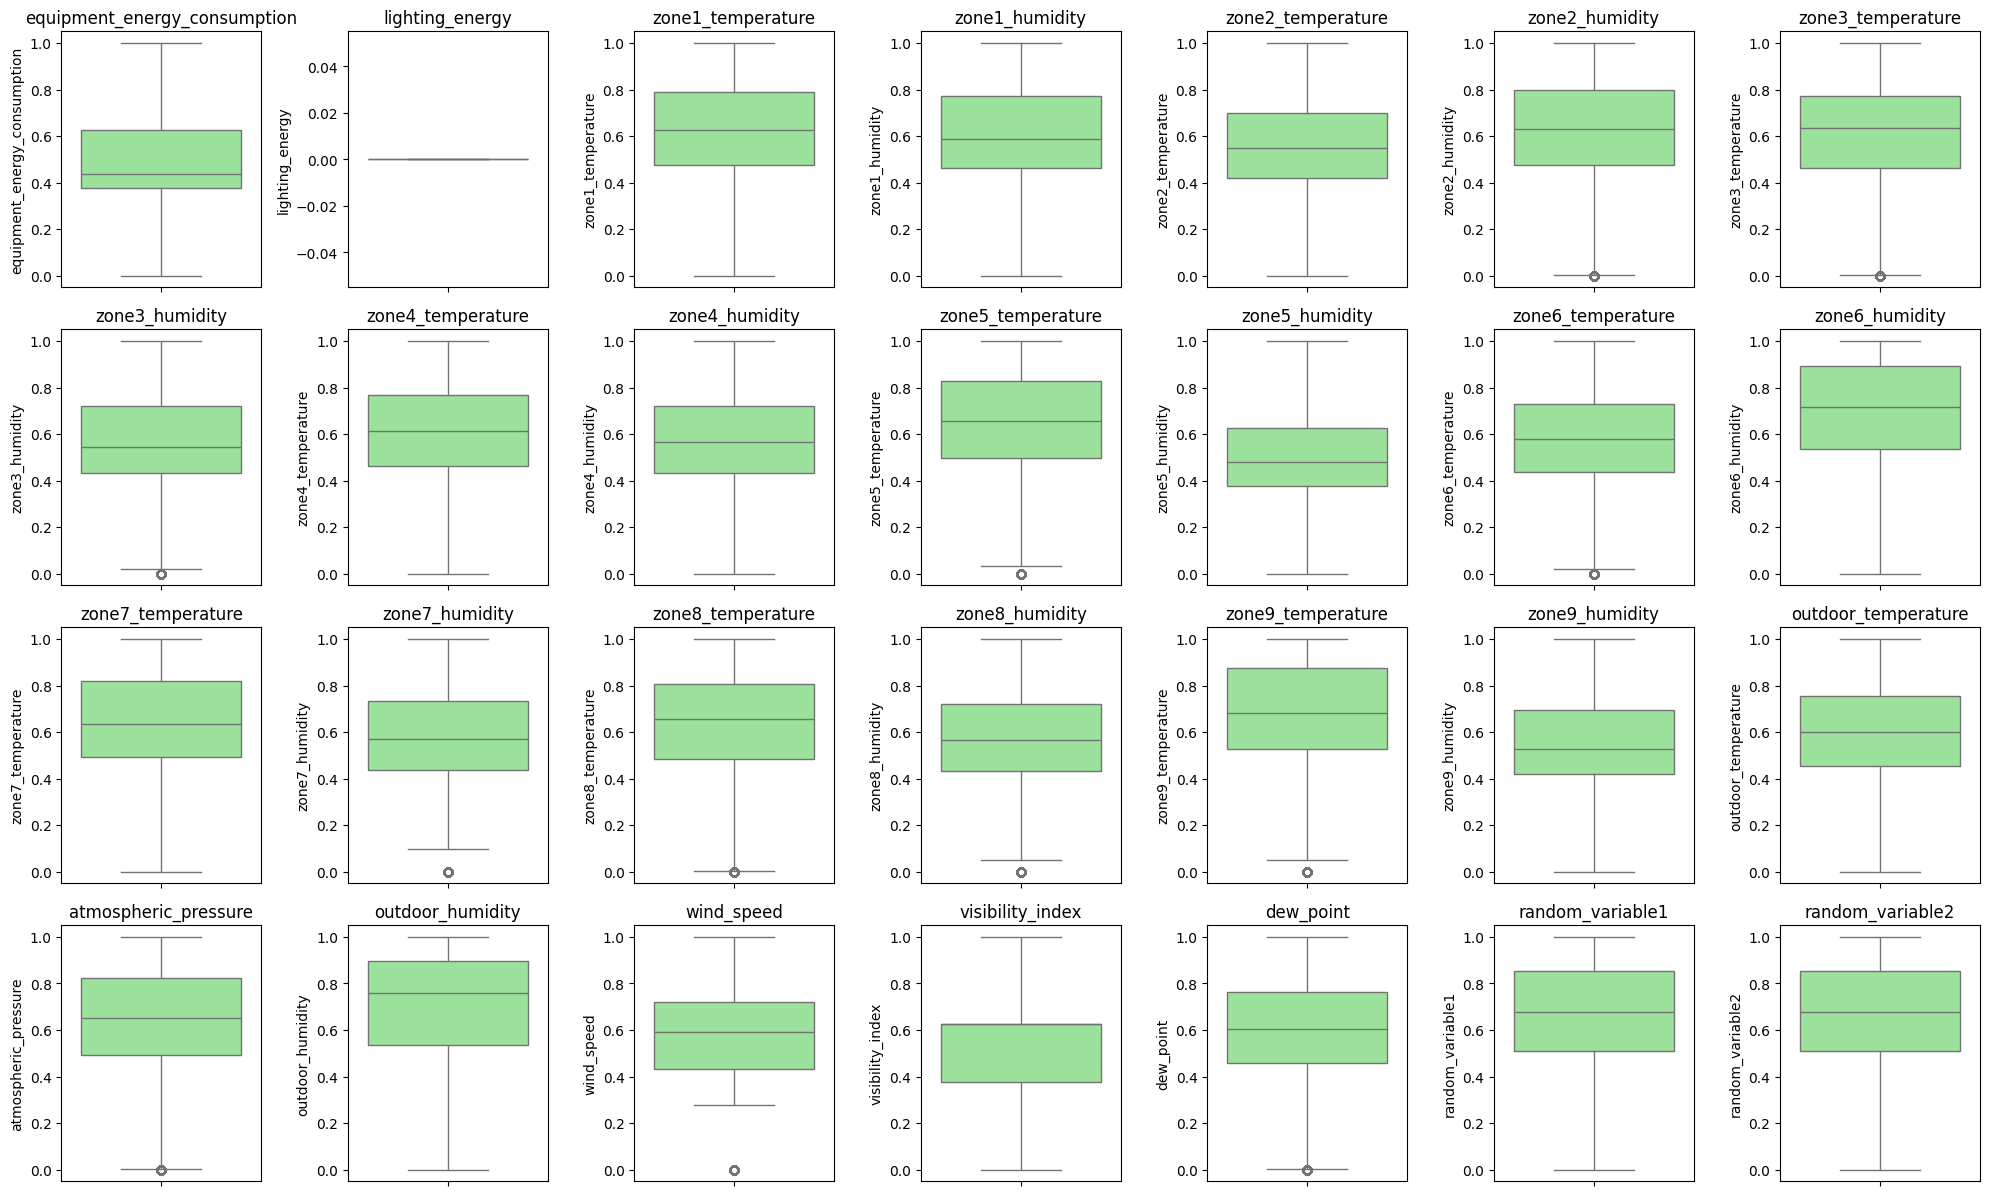

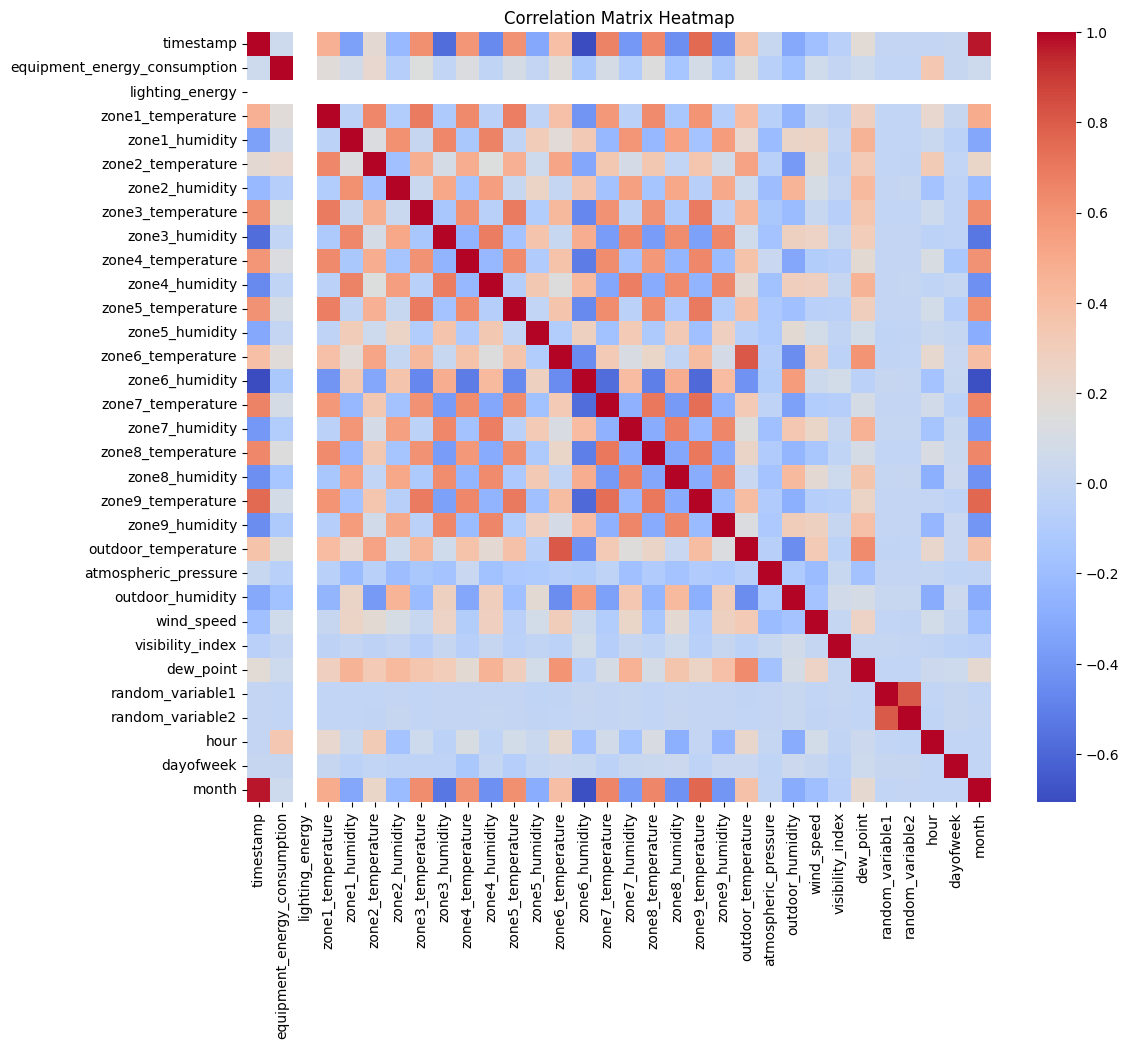

In [39]:
# Histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 7, i + 1)
    if isinstance(df[col], pd.Series):
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    elif isinstance(df[col], pd.DataFrame):
        num_cols = df[col].shape[1]
        colors = plt.cm.get_cmap('viridis', num_cols)
        for j in range(num_cols):
            plt.hist(df[col].iloc[:, j], bins=20, color=colors(j), edgecolor='black', alpha=0.7)
    else:
        print(f"Skipping column '{col}' due to unsupported data type.")

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 7, i + 1)
    sns.boxplot(y=df[col], color='darkgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

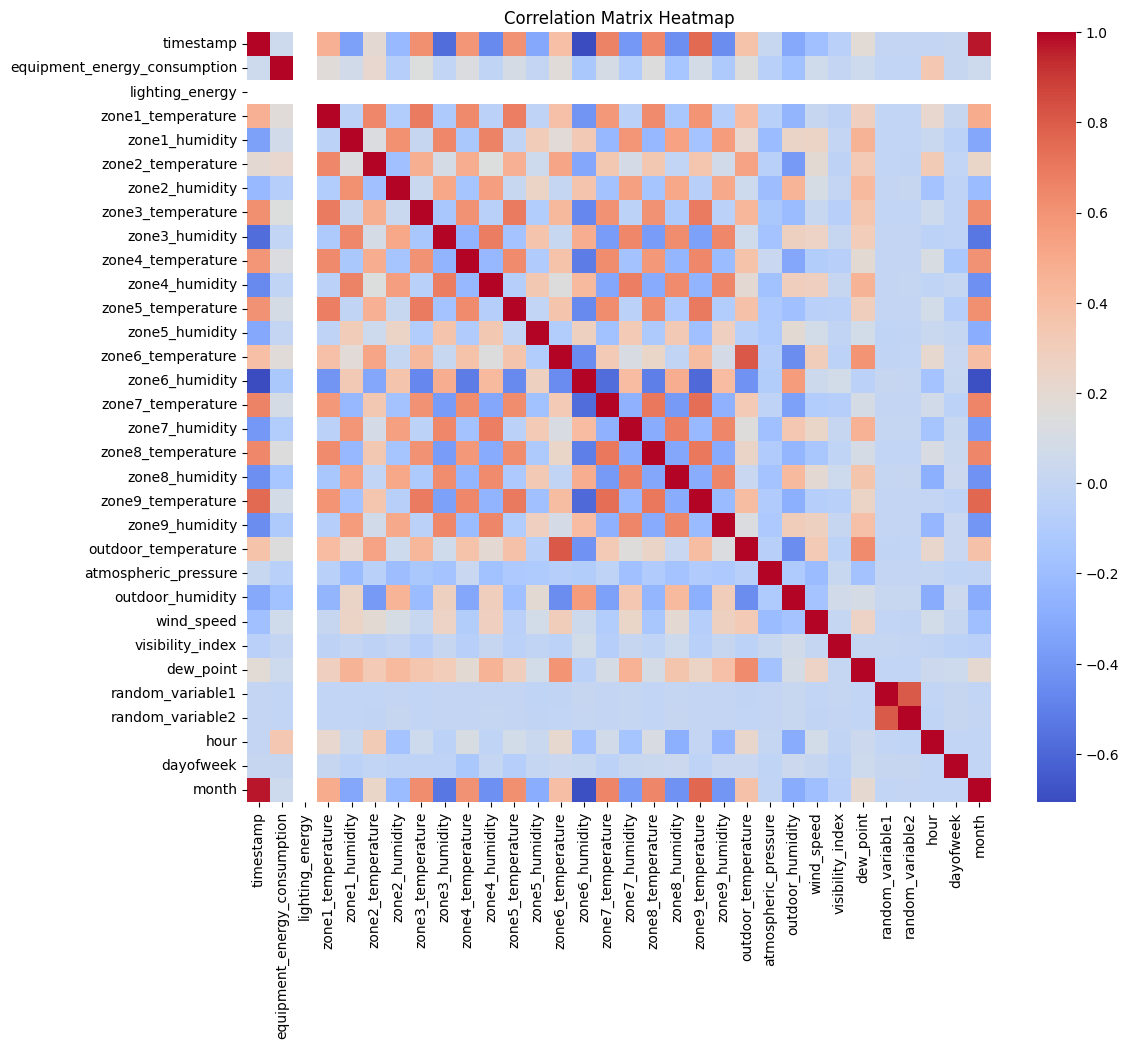

In [9]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

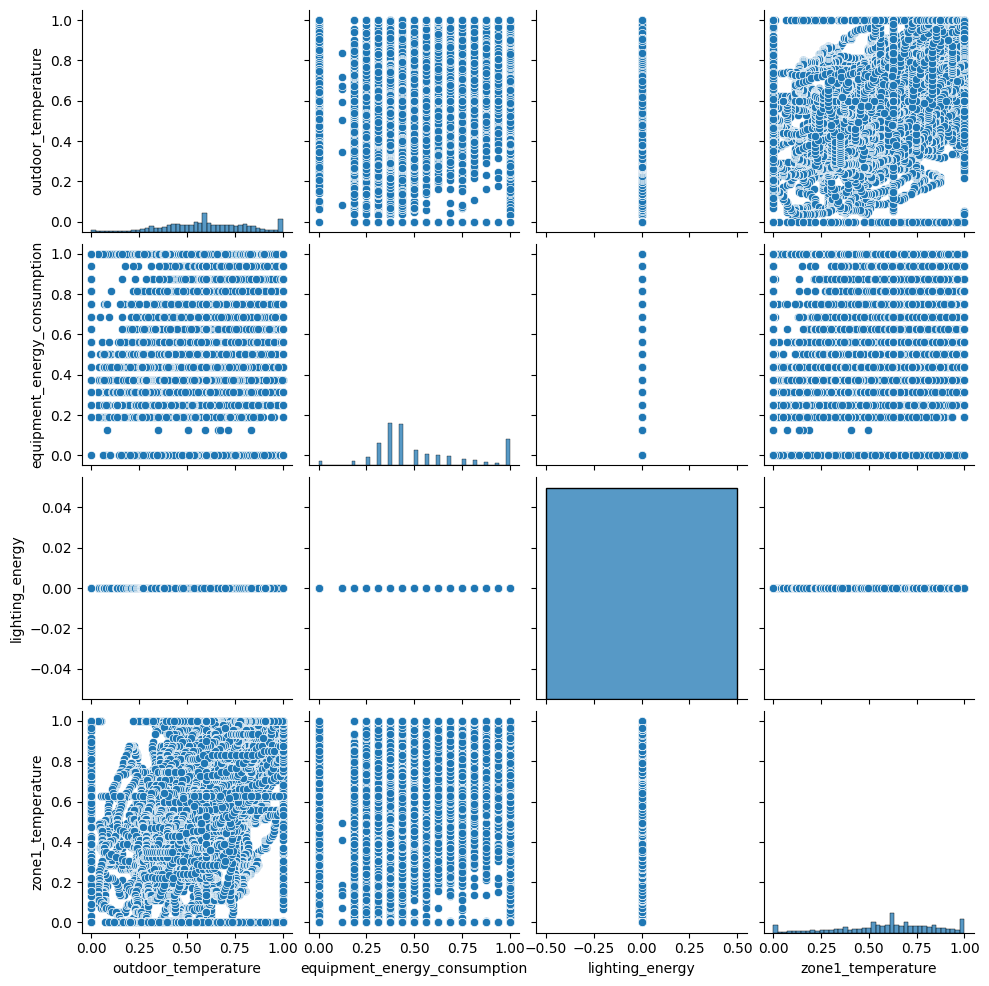

In [11]:
# Select a subset of numerical columns for the pair plot
numerical_cols_subset = ['outdoor_temperature', 'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature']

# Create a pair plot
sns.pairplot(df[numerical_cols_subset])
plt.show()

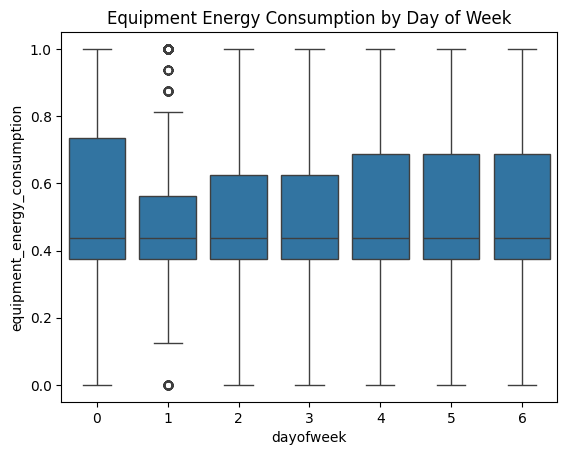

In [12]:
# Example: Equipment energy consumption across different days of the week
sns.boxplot(x='dayofweek', y='equipment_energy_consumption', data=df)
plt.title('Equipment Energy Consumption by Day of Week')
plt.show()


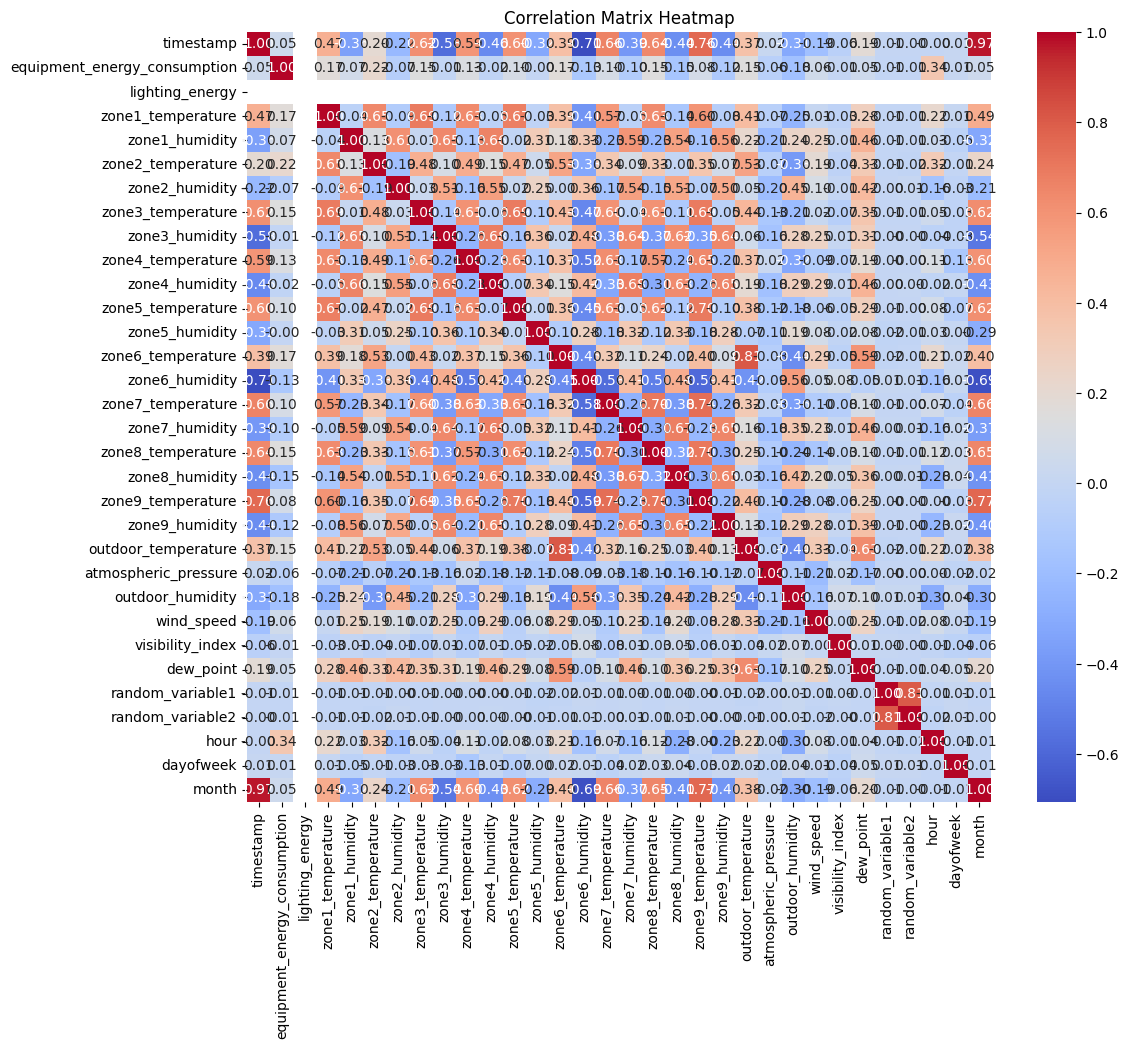

In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annotations for better readability
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# Calculate skewness and kurtosis
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurt()

print("\n--- Skewness ---\n")
print(skewness.to_markdown(numalign="left", stralign="left"))
# Calculate skewness and kurtosis
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurt()

print("\n--- Skewness ---\n")
print(skewness.to_markdown(numalign="left", stralign="left"))

print("\n--- Kurtosis ---\n")
print(kurtosis.to_markdown(numalign="left", stralign="left"))


--- Skewness ---

|                              | 0           |
|:-----------------------------|:------------|
| equipment_energy_consumption | 0.722518    |
| lighting_energy              | 0           |
| zone1_temperature            | -0.566544   |
| zone1_humidity               | -0.134552   |
| zone2_temperature            | 0.0883853   |
| zone2_humidity               | -0.560177   |
| zone3_temperature            | -0.380196   |
| zone3_humidity               | 0.192605    |
| zone4_temperature            | -0.471153   |
| zone4_humidity               | 0.110522    |
| zone5_temperature            | -0.433206   |
| zone5_humidity               | 0.599311    |
| zone6_temperature            | -0.126516   |
| zone6_humidity               | -0.671568   |
| zone7_temperature            | -0.389513   |
| zone7_humidity               | -0.0661935  |
| zone8_temperature            | -0.633635   |
| zone8_humidity               | -0.00606943 |
| zone9_temperature            | -0.51812

# 5. Feature Engineering by adding polynomial features


In [15]:
# Assuming 'timestamp' is your datetime column
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract features like hour, dayofweek, month, etc.
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

In [16]:
# Example: Interaction between outdoor temperature and zone1 temperature
df['outdoor_zone1_temp_interaction'] = df['outdoor_temperature'] * df['zone1_temperature']

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features for polynomial expansion
numerical_features = ['outdoor_temperature', 'zone1_temperature', 'lighting_energy', 'equipment_energy_consumption']

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[numerical_features])

# Add polynomial features to the DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
df = pd.concat([df, poly_df], axis=1)

In [18]:
df

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,outdoor_temperature^2,outdoor_temperature zone1_temperature,outdoor_temperature lighting_energy,outdoor_temperature equipment_energy_consumption,zone1_temperature^2,zone1_temperature lighting_energy,zone1_temperature equipment_energy_consumption,lighting_energy^2,lighting_energy equipment_energy_consumption,equipment_energy_consumption^2
0,2016-01-11 17:00:00,0.4375,0.0,1.000000,1.000000,0.492667,0.927221,0.345133,0.542593,0.416362,...,0.396058,0.629332,0.0,0.275333,1.000000,0.0,0.437500,0.0,0.0,0.191406
1,2016-01-11 17:10:00,0.4375,0.0,0.324211,1.000000,0.492667,0.922795,0.345133,0.975178,0.416362,...,0.388555,0.202094,0.0,0.272712,0.105112,0.0,0.141842,0.0,0.0,0.191406
2,2016-01-11 17:20:00,0.3750,0.0,0.324211,1.000000,0.492667,0.916512,0.345133,0.984881,1.000000,...,0.381124,0.200152,0.0,0.231507,0.105112,0.0,0.121579,0.0,0.0,0.140625
3,2016-01-11 17:30:00,0.3750,0.0,1.000000,0.998365,0.492667,0.914108,0.345133,0.989394,0.615014,...,0.373765,0.611363,0.0,0.229261,1.000000,0.0,0.375000,0.0,0.0,0.140625
4,2016-01-11 17:40:00,0.4375,0.0,0.324211,1.000000,0.492667,0.910174,0.345133,0.989394,0.399423,...,0.366477,0.196268,0.0,0.264851,0.105112,0.0,0.141842,0.0,0.0,0.191406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16852,2016-10-03 20:10:00,1.0000,0.0,0.789474,0.559232,0.573786,0.584745,0.566372,0.572718,0.784408,...,0.347058,0.465092,0.0,0.589116,0.623269,0.0,0.789474,0.0,0.0,1.000000
16853,2016-10-04 06:10:00,0.3750,0.0,0.618947,0.613252,0.341430,0.894438,0.728614,0.566964,0.615014,...,0.230009,0.296843,0.0,0.179847,0.383096,0.0,0.232105,0.0,0.0,0.140625
16854,2016-11-03 00:50:00,0.3750,0.0,0.640000,0.491459,0.391384,0.610971,0.538348,0.501298,0.662753,...,0.144656,0.243416,0.0,0.142626,0.409600,0.0,0.240000,0.0,0.0,0.140625
16855,2016-11-04 13:20:00,0.5625,0.0,0.873684,0.597305,1.000000,0.333188,0.833333,0.515514,0.923003,...,1.000000,0.873684,0.0,0.562500,0.763324,0.0,0.491447,0.0,0.0,0.316406


Adding 19 new coloumbs

Performing PCA (Principal Component Analysis) for dimensionality reduction and to retain important features

Explained Variance Ratio: [0.45115387 0.18672046 0.1755472  0.10502892 0.05309769]


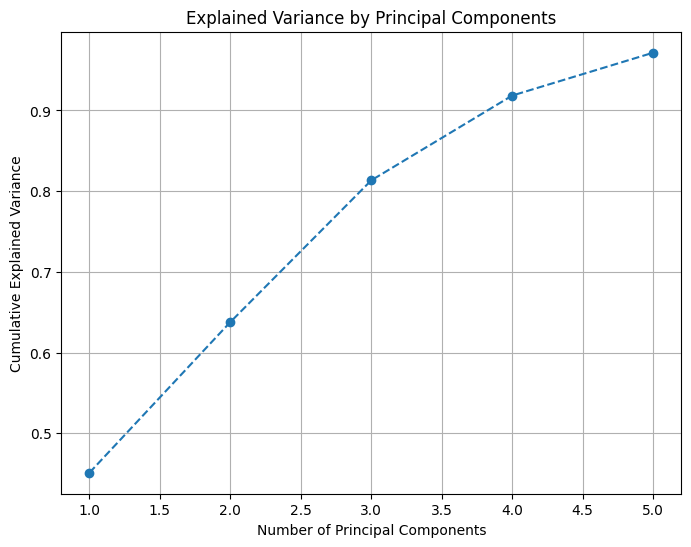

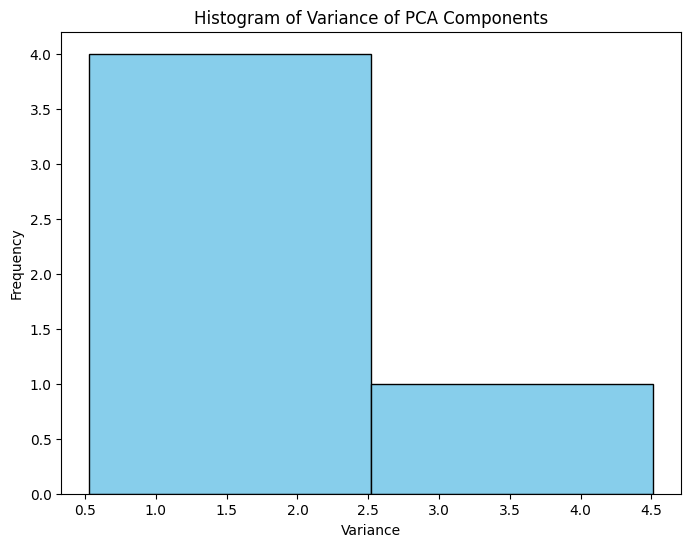

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Select numerical features for PCA
# Exclude 'timestamp', 'hour', 'dayofweek', 'month' and any other categorical or engineered features
numerical_features_for_pca = ['outdoor_temperature', 'zone1_temperature', 'lighting_energy', 'equipment_energy_consumption',
                             'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
                             'outdoor_zone1_temp_interaction']


data_for_pca = df[numerical_features_for_pca]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance = pca.explained_variance_

# Plot the histogram of variance
plt.figure(figsize=(8, 6))
plt.hist(explained_variance, bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of Variance of PCA Components')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

# 7. Concatenate PCA components with original DataFrame
combined_df = pd.concat([df, pca_df], axis=1)


# 6. Model Selection, Training and Testing

Using Linear regression, Random Forest Regressor, Decision Tree Regressor

Linear Regression serves as a foundational model, offering a straightforward starting point. Beginning with a simple and interpretable approach like Linear Regression allows for setting a baseline performance metric and assessing whether a more advanced technique is warranted. If the dataset demonstrates a clear linear correlation between features and the target variable (such as equipment energy consumption), this method can deliver an effective solution while maintaining the advantages of simplicity and transparency.

Random Forest is a powerful and flexible model, well-suited for capturing complex, non-linear relationships in energy consumption. Its accuracy and ability to handle feature interactions make it a strong choice for reliable predictions.

Decision Tree is an interpretable model that effectively captures non-linear relationships. Its structured approach balances simplicity with predictive capability, making it useful for understanding key factors influencing energy consumption.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

target = combined_df['equipment_energy_consumption']
# 1. Select features for training
features = ['PC1', 'PC2', 'outdoor_temperature', 'zone1_temperature', 'lighting_energy']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], target, test_size=0.2, random_state=42)

# 3. Define models and hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),  # No hyperparameters for Linear Regression
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    })
}

# 4. Perform GridSearchCV for hyperparameter tuning and cross-validation
best_models = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best hyperparameters = {grid_search.best_params_}")

# 5. Make predictions on the test set using the best models
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_test)

# 6. Evaluate model performance
results = {}
for name, prediction in predictions.items():
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction) # Calculate RMSE
    mae = mean_absolute_error(y_test, prediction)  # Calculate MAE
    r2 = r2_score(y_test, prediction)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}

# 7. Compare model performance
print("\nModel Performance:")
for name, result in results.items():
    print(f"{name}: MSE = {result['MSE']:.4f}, RMSE = {result['RMSE']:.4f}, MAE = {result['MAE']:.4f}, R-squared = {result['R-squared']:.4f}")

# 8. Choose the best model and make predictions on new data
best_model_name = min(results, key=lambda k: results[k]['MSE'])
best_model = best_models[best_model_name]


Linear Regression: Best hyperparameters = {}
Random Forest: Best hyperparameters = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Decision Tree: Best hyperparameters = {'max_depth': 10, 'min_samples_split': 10}

Model Performance:
Linear Regression: MSE = 0.0024, RMSE = 0.0024, MAE = 0.0385, R-squared = 0.9577
Random Forest: MSE = 0.0015, RMSE = 0.0015, MAE = 0.0267, R-squared = 0.9728
Decision Tree: MSE = 0.0022, RMSE = 0.0022, MAE = 0.0331, R-squared = 0.9608


In [24]:
best_model

RandomForestRegressor(n_estimators=300, random_state=42)

After comparing between the models we can say random forest regressor is the best model for predicting the values of equipment_energy_consumption

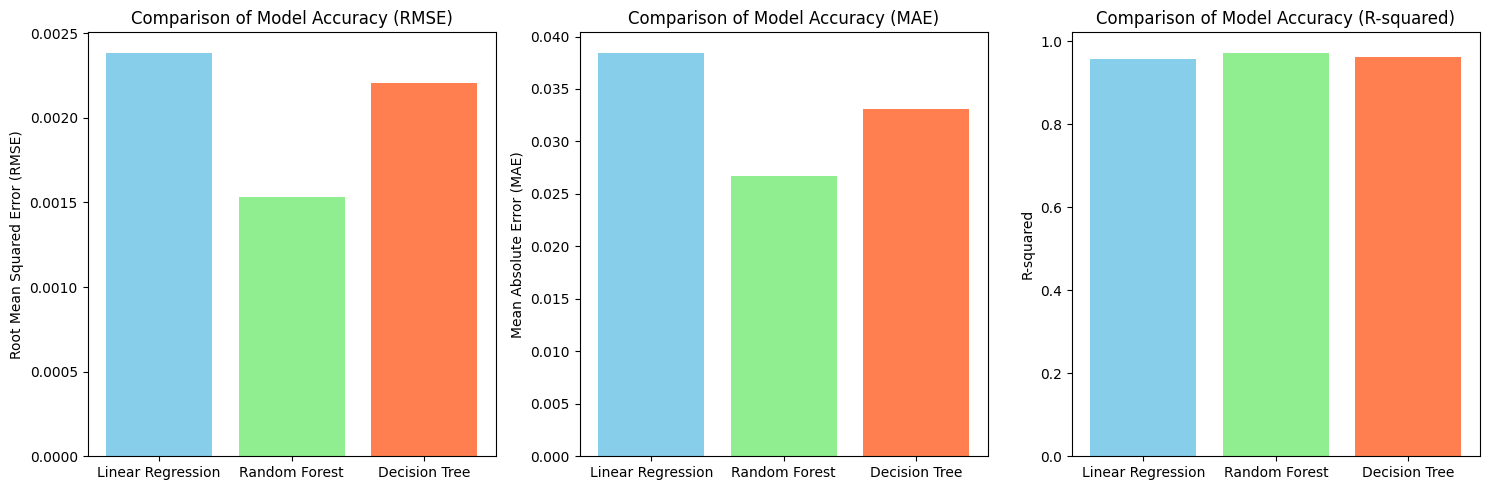

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is the dictionary containing your model evaluation results
model_names = list(results.keys())
rmse_values = [results[name]['RMSE'] for name in model_names]
mae_values = [results[name]['MAE'] for name in model_names]
r2_values = [results[name]['R-squared'] for name in model_names]

# Create bar plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RMSE plot
axes[0].bar(model_names, rmse_values, color=['skyblue', 'lightgreen', 'coral'])
axes[0].set_title('Comparison of Model Accuracy (RMSE)')
axes[0].set_ylabel('Root Mean Squared Error (RMSE)')

# MAE plot
axes[1].bar(model_names, mae_values, color=['skyblue', 'lightgreen', 'coral'])
axes[1].set_title('Comparison of Model Accuracy (MAE)')
axes[1].set_ylabel('Mean Absolute Error (MAE)')

# R-squared plot
axes[2].bar(model_names, r2_values, color=['skyblue', 'lightgreen', 'coral'])
axes[2].set_title('Comparison of Model Accuracy (R-squared)')
axes[2].set_ylabel('R-squared')

# Adjust layout and display plots
plt.tight_layout()
plt.show()